In [1]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

from numpy.linalg import inv

In [2]:
import utils.truncated_Gaussians as trGauss
import utils.truncated_Gumbel as trGumb
import utils.truncated_Triangular as trTriang
import utils.truncated_Gamma as trGam


"""
Comment on these modules
"""

'\nComment on these modules\n'

In [3]:
%matplotlib notebook

In [20]:
p1 = 0.1
p2 = 2
a,b = -1,1

J=trGauss.J(p1,p2,a,b)
print(J)

eigval, eigvect = np.linalg.eigh(trGauss.J(p1,p2,a,b))

print("")
print(eigvect)
print("")





[[ 0.02014492 -0.00194675]
 [-0.00194675  0.00154302]]

[[-0.10298099 -0.99468332]
 [-0.99468332  0.10298099]]

[-0.10298099 -0.99468332]


In [44]:
def tracer_sphere_tr_avec_geod_non_unif(p,delta,nb_pts,h,a,b):
    
    p1=p[0]
    p2=p[1]
    L = np.linspace(0,2*np.pi,nb_pts)
    j = 0    
    n = np.int64(1/h)    # step size for each geodesic
    C = np.zeros((nb_pts,2))    
    Liste = []
    
    eigval, eigvect = np.linalg.eigh(trGauss.J(p1,p2,a,b))
    v1 = eigvect[:,0]
    v2 = eigvect[:,1]
    
    for t in L:
        #v = np.cos(t)*v1 + np.sin(t)*v2
        v = np.array([np.cos(t),np.sin(t)])
        l_J = np.sqrt(np.dot(np.transpose(v),np.dot(trGauss.I(p1,p2),v)))
        v_J = delta*(v/l_J)
        X0_J = np.array([p1,p2,v_J[0],v_J[1]])
        X,Y = trGauss.geod_non_tronquees(1,h,X0_J)
        Liste.append([X,Y])
        C[j,:] = np.array([ X[-1],Y[-1] ])
        j+=1
    
    return n,C,np.array(Liste)

def tracer_sphere_tr_avec_geod_unif(p,delta,nb_pts,h,a,b):
    
    p1=p[0]
    p2=p[1]
    L = np.linspace(0,2*np.pi,nb_pts)
    j = 0    
    n = np.int64(1/h)    # step size for each geodesic
    C = np.zeros((nb_pts,2))    
    Liste = []
    
    eigval, eigvect = np.linalg.eigh(trGauss.J(p1,p2,a,b))
    v1 = eigvect[:,0]
    v2 = eigvect[:,1]
    
    for t in L:
        v = np.cos(t)*v1 + np.sin(t)*v2
        #v = np.array([np.cos(t),np.sin(t)])
        l_J = np.sqrt(np.dot(np.transpose(v),np.dot(trGauss.I(p1,p2),v)))
        v_J = delta*(v/l_J)
        X0_J = np.array([p1,p2,v_J[0],v_J[1]])
        X,Y = trGauss.geod_non_tronquees(1,h,X0_J)
        Liste.append([X,Y])
        C[j,:] = np.array([ X[-1],Y[-1] ])
        j+=1
    
    return n,C,np.array(Liste)

nb_pt = 50
n,C,Liste_non_unif = tracer_sphere_tr_avec_geod_non_unif(p = [0,0.2], delta = 1, nb_pts = nb_pt, h = 0.01, a = -2.5, b = 2.5)
n,C,Liste_unif = tracer_sphere_tr_avec_geod_unif(p = [0,0.2], delta = 1, nb_pts = nb_pt, h = 0.01, a = -2.5, b = 2.5)

<IPython.core.display.Javascript object>


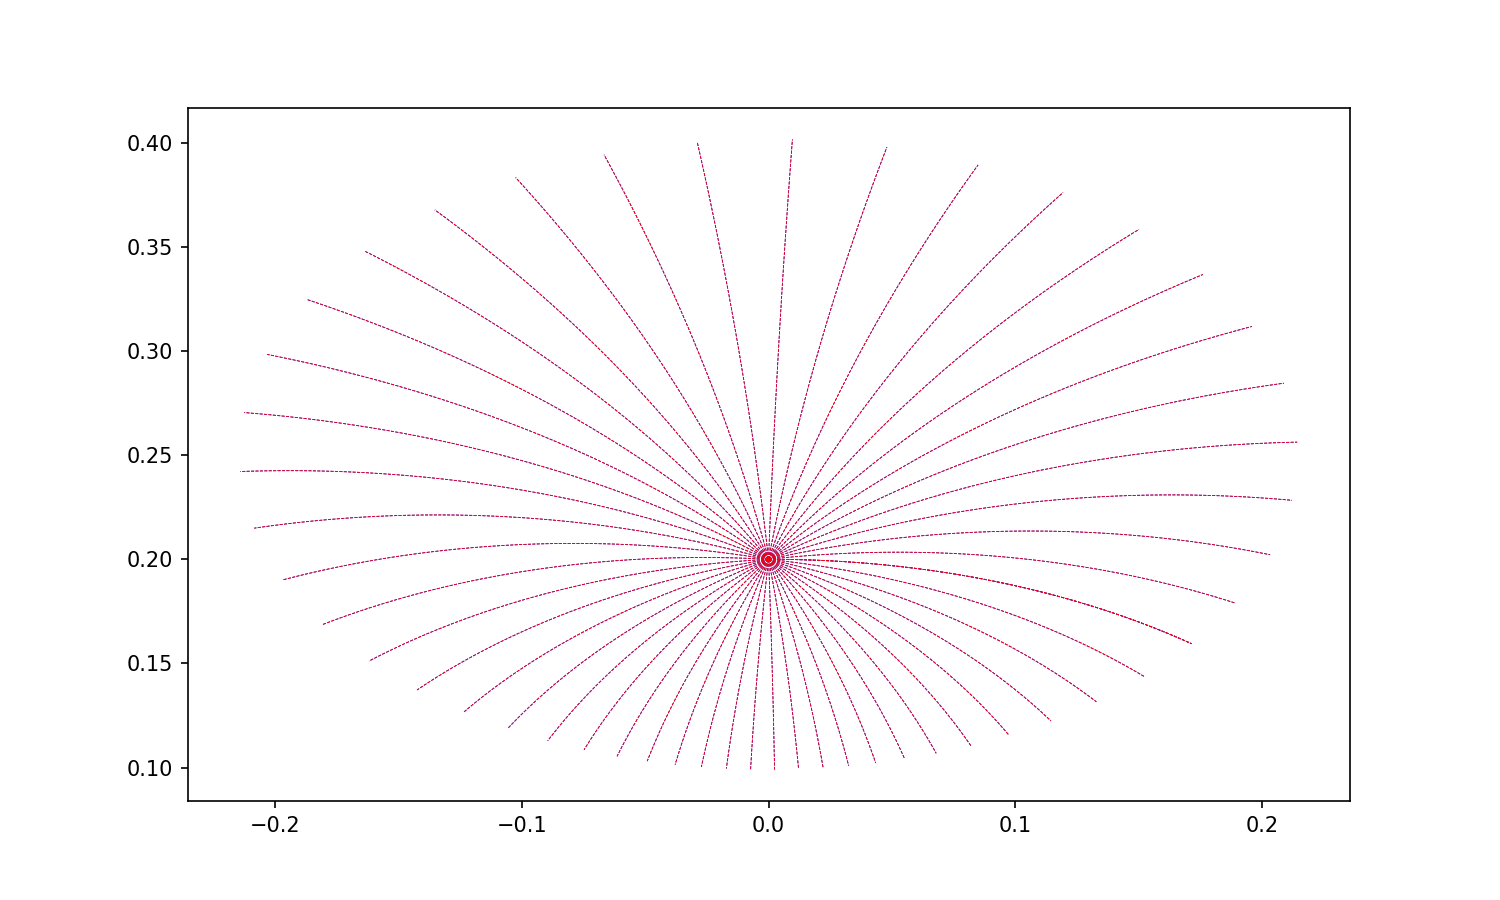

In [46]:
plt.figure(figsize=(10,6))

for i in range(nb_pt):
    X= Liste_non_unif[i][0]
    Y= Liste_non_unif[i][1]
    plt.plot(X,Y,color="blue",ls='--',linewidth = 0.4)
    
for i in range(nb_pt):
    X= Liste_unif[i][0]
    Y= Liste_unif[i][1]
    plt.plot(X,Y,color="red",ls='--',linewidth = 0.4)

# Fisher-Rao spheres computation in some parametric families

## Normal family

In [274]:
#truncation interval
a,b = -2,2

#number of points on the sphere for approximation
nb_pts = 100

#stepsize in the Euler method for solving the geodesic equations
h = 0.01

#center point and radius of sphere
p = [0,1]
delta = 0.4

# We now compute the sphere in the truncated and non-truncated case

start = timeit.default_timer()
n,C_tr,Liste_tr = trGauss.tracer_sphere_tr_avec_geod(p,delta,nb_pts,h,a,b)
n,C_nontr,Liste_nontr = trGauss.tracer_sphere_nontr_avec_geod(p,delta,nb_pts,h)
stop = timeit.default_timer()
print(stop-start, "seconds")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
579.2720107169589 seconds


In [50]:
# Helper function to compute equally spaced concentric spheres given some points on the outermost sphere
def concentric_spheres(Liste_geod,n,nb_spheres):
    liste_de_spheres_pt = []
    for i in range(1,nb_spheres+1):
        k=int(n*i/nb_spheres)-1
        XXk = [X[k] for X in Liste_geod[:,0]]
        YYk = [Y[k] for Y in Liste_geod[:,1]]
        liste_de_spheres_pt.append(np.array([XXk,YYk]))
        
    return np.array(liste_de_spheres_pt)

<IPython.core.display.Javascript object>


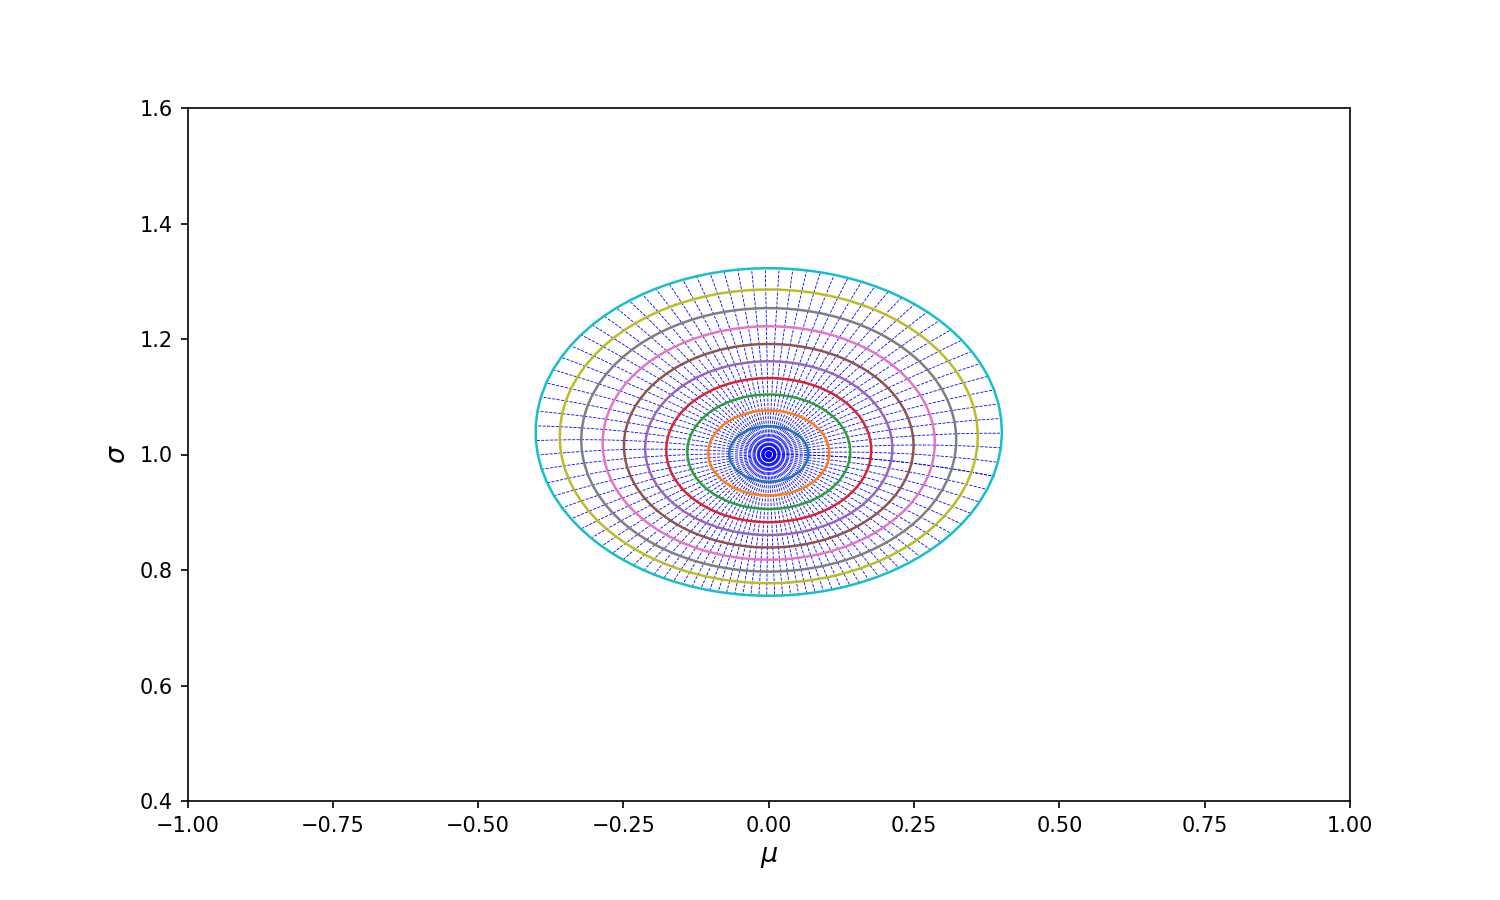

<IPython.core.display.Javascript object>


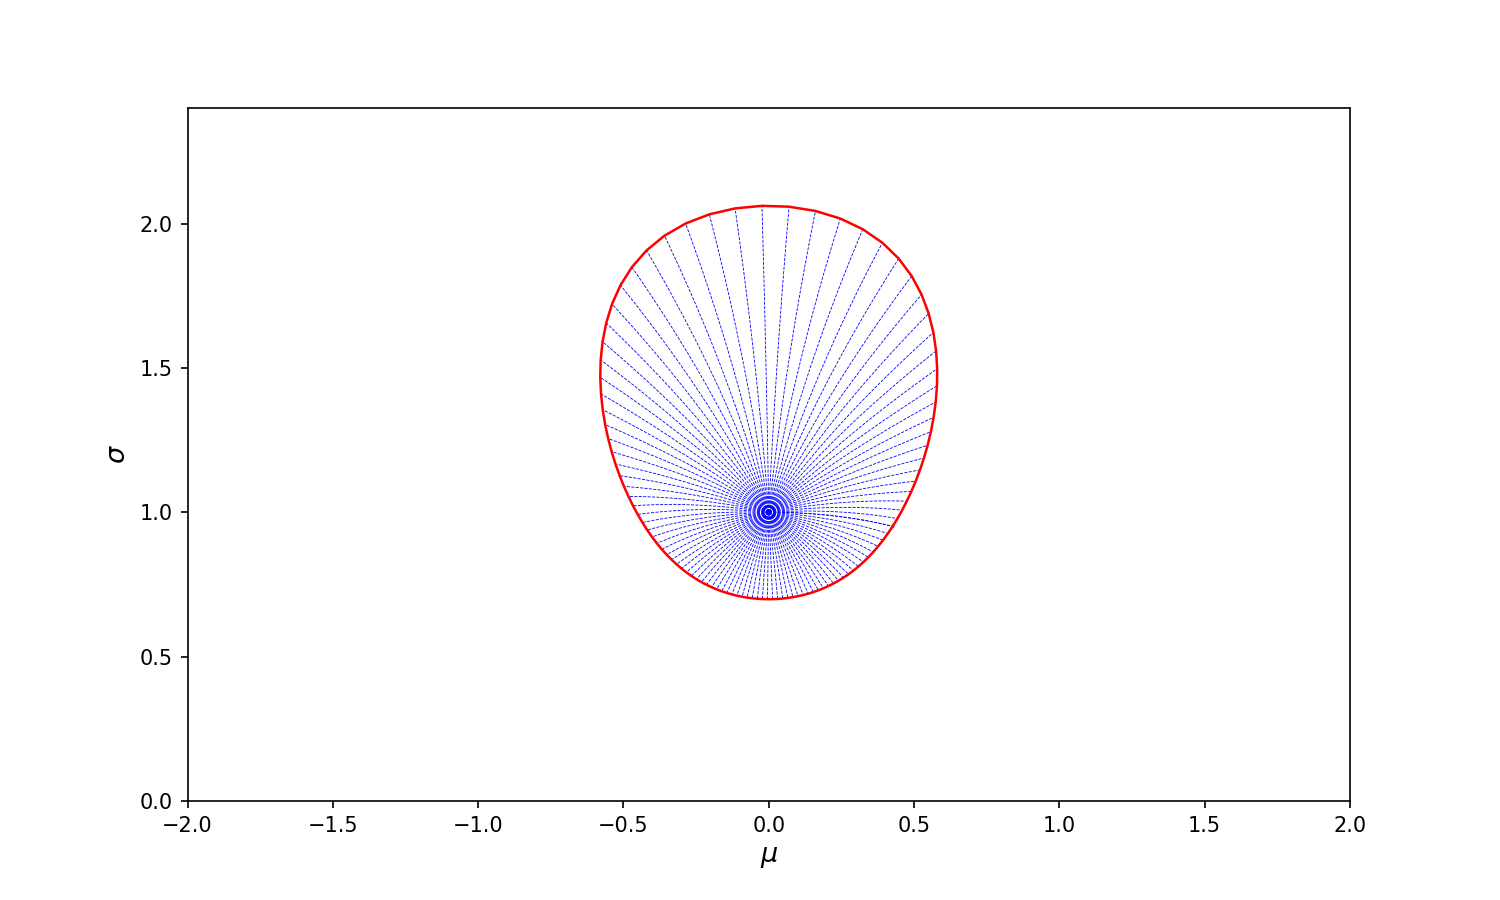

In [280]:
# Draws the geodesics going from the center of the sphere in the non truncated case
plt.figure(figsize=(10,6))
for i in range(nb_pts):
    X= Liste_nontr[i][0]
    Y= Liste_nontr[i][1]
    plt.plot(X,Y,color="blue",ls='--',linewidth = 0.4)

# nomber of concentric spheres
nb_sphere = 10

# Draws the concentric spheres
l = concentric_spheres(Liste_nontr,n,nb_sphere+1)
for i in range(1,nb_sphere):
    plt.plot(l[i][0],l[i][1],linewidth=1.2)
plt.plot(C_nontr[:,0],C_nontr[:,1],linewidth=1.2)
#plt.xlim(-3.5,3.5)
#plt.ylim(0,4.2)
plt.xlim(-1,1)
plt.ylim(0.4,0.4 +3/2.5)
plt.xlabel('$\mu$',fontsize="13")
plt.ylabel('$\sigma$',fontsize="13");

plt.show()

# Draws the geodesics going from the center of the sphere in the truncated case

plt.figure(figsize=(10,6))
for i in range(nb_pts):
    X= Liste_tr[i][0]
    Y= Liste_tr[i][1]
    plt.plot(X,Y,color="blue",ls='--',linewidth = 0.4)

# nomber of concentric spheres
nb_sphere = 10

# Draws the concentric spheres
l = concentric_spheres(Liste_tr,n,nb_sphere+1)
#for i in range(1,nb_sphere):
#    plt.plot(l[i][0],l[i][1],linewidth=1.2)
plt.plot(C_tr[:,0],C_tr[:,1],linewidth=1.2,color='red')
plt.xlim(-2,2)
plt.ylim(0,2.4)
plt.xlabel('$\mu$',fontsize="13")
plt.ylabel('$\sigma$',fontsize="13");

<IPython.core.display.Javascript object>


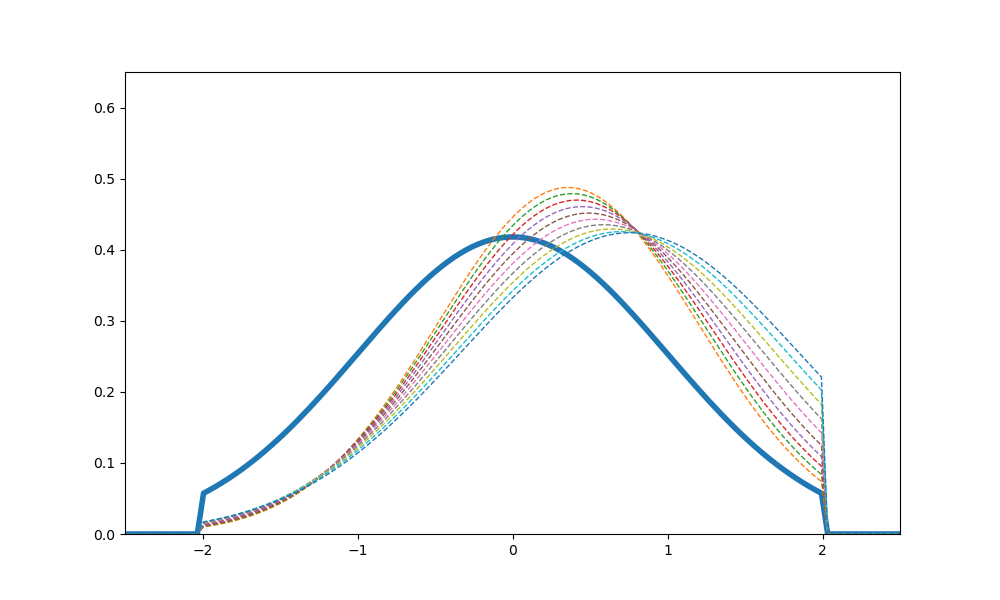

<IPython.core.display.Javascript object>


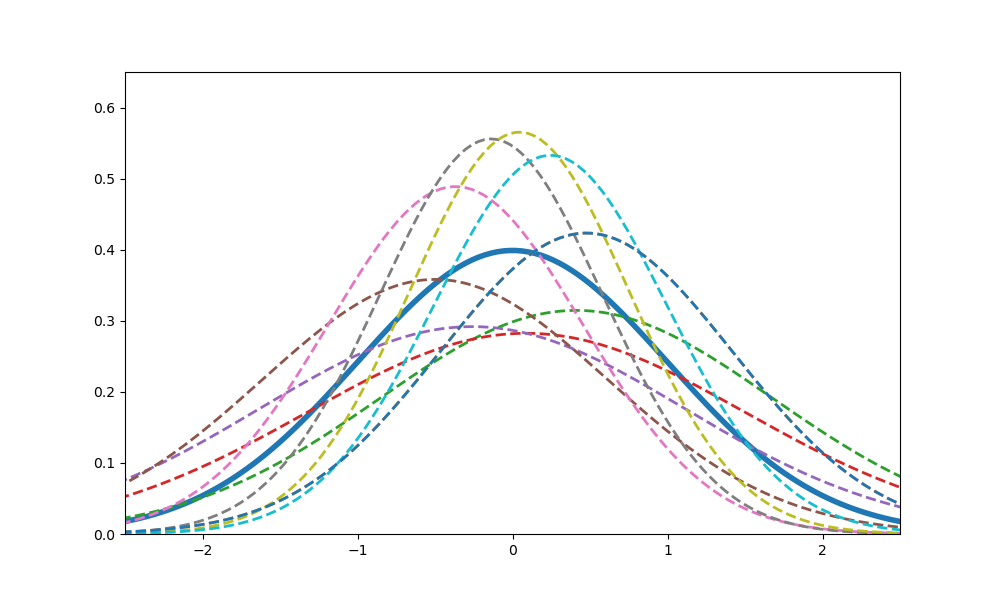

In [259]:
t = np.linspace(-3,3,150)
plt.figure(figsize=(10,6))

# For the truncated case

    # compute and plot the initial density function 
L = [trGauss.q(p[0],p[1],x,a,b) for x in t]
plt.plot(t,L,linewidth=4.0)

    # compute and plot the perturbed density functions
for i in range(nb_pts):
    Lp = [trGauss.q(C_tr[i,0],C_tr[i,1],x,a,b) for x in t]
    plt.plot(t,Lp,linewidth=1.0,ls='--')

plt.ylim(0,0.65)
plt.xlim(-2.5,2.5);
plt.show()
# For the non-truncated case

plt.figure(figsize=(10,6))

    # compute and plot the initial density function 
L = [trGauss.p(p[0],p[1],x) for x in t]
plt.plot(t,L,linewidth=4.0)

    # compute and plot the perturbed density functions
for i in range(nb_pts):
    Lp = [trGauss.p(C_nontr[i,0],C_nontr[i,1],x) for x in t]
    plt.plot(t,Lp,linewidth=2.0,ls='--')

plt.ylim(0,0.65)
plt.xlim(-2.5,2.5);  

## Log-normal family

In [249]:
print(np.log(4))

1.3862943611198906


In [250]:
#truncation interval
a,b = np.log(0.25),np.log(4)

#number of points on the sphere for approximation
nb_pts = 10

#stepsize in the Euler method for solving the geodesic equations
h = 0.01

#center point and radius of sphere
p = [0,1]
delta = 0.3

# We now compute the sphere in the truncated and non-truncated case

start = timeit.default_timer()
n,C_tr_lognorm,Liste_tr_lognorm = trGauss.tracer_sphere_tr_avec_geod(p,delta,nb_pts,h,a,b)
n,C_nontr_lognorm,Liste_nontr_lognorm = trGauss.tracer_sphere_nontr_avec_geod(p,delta,nb_pts,h)
stop = timeit.default_timer()
print(stop-start, "seconds")

0
1


/home/bketema/Bureau/Python notebooks/modele_crue/utils/truncated_Gaussians.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  return p(m,s,x)/P_theta
/home/bketema/Bureau/Python notebooks/modele_crue/utils/truncated_Gaussians.py:51: RuntimeWarning: invalid value encountered in scalar subtract
  A = (x-m)/(s**2)  + qmsbab - qmsaab
/home/bketema/Bureau/Python notebooks/modele_crue/utils/truncated_Gaussians.py:52: RuntimeWarning: invalid value encountered in scalar subtract
  B = 1/s  * ( (b-m)*qmsbab  - (a-m)*qmsaab )  - 1/s  +  (x-m)**2/(s**3)
/home/bketema/Bureau/Python notebooks/modele_crue/utils/truncated_Gaussians.py:70: RuntimeWarning: invalid value encountered in scalar subtract
  Amm = (x-m)/(s**2) + qmsbab - qmsaab
/home/bketema/Bureau/Python notebooks/modele_crue/utils/truncated_Gaussians.py:73: RuntimeWarning: invalid value encountered in scalar subtract
  Ams = (x-m)/(s**2) + qmsbab - qmsaab
/home/bketema/Bureau/Python notebooks/modele_crue/utils/truncated_

2
3
4
5
6
7
8
9
71.28126543504186 seconds


<IPython.core.display.Javascript object>


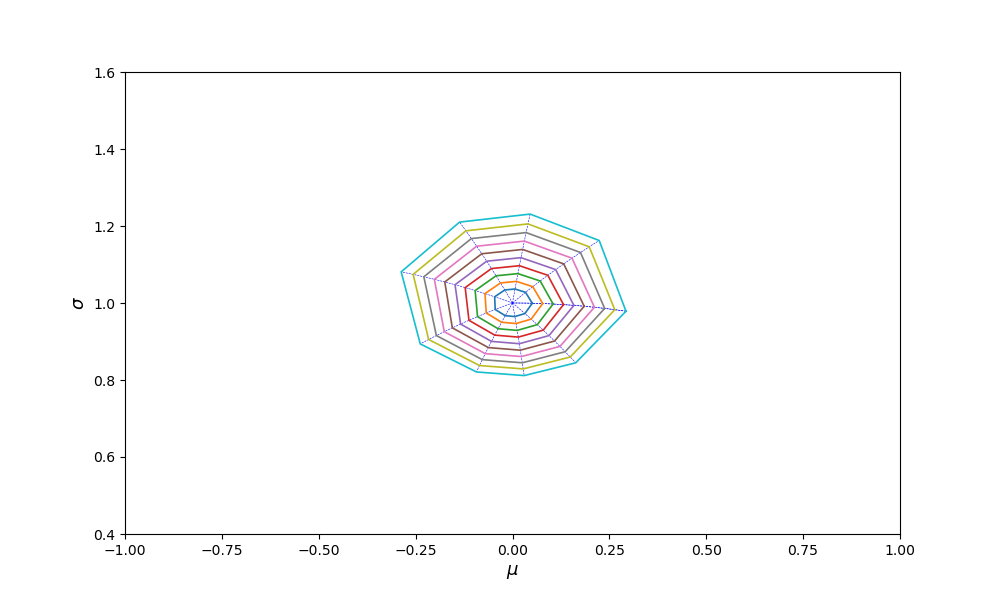

<IPython.core.display.Javascript object>


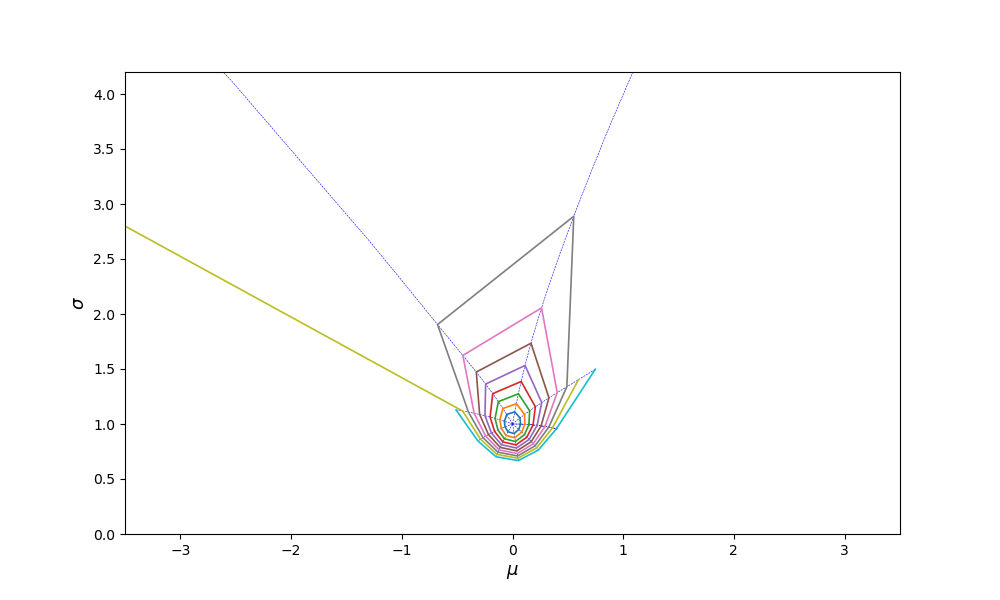

In [251]:
# Draws the geodesics going from the center of the sphere in the non truncated case
plt.figure(figsize=(10,6))
for i in range(nb_pts):
    X= Liste_nontr_lognorm[i][0]
    Y= Liste_nontr_lognorm[i][1]
    plt.plot(X,Y,color="blue",ls='--',linewidth = 0.4)

# nomber of concentric spheres
nb_sphere = 10

# Draws the concentric spheres
l = concentric_spheres(Liste_nontr_lognorm,n,nb_sphere+1)
for i in range(1,nb_sphere):
    plt.plot(l[i][0],l[i][1],linewidth=1.2)
plt.plot(C_nontr_lognorm[:,0],C_nontr_lognorm[:,1],linewidth=1.2)
#plt.xlim(-3.5,3.5)
#plt.ylim(0,4.2)
plt.xlim(-1,1)
plt.ylim(0.4,0.4 +3/2.5)
plt.xlabel('$\mu$',fontsize="13")
plt.ylabel('$\sigma$',fontsize="13");

plt.show()

# Draws the geodesics going from the center of the sphere in the truncated case

plt.figure(figsize=(10,6))
for i in range(nb_pts):
    X= Liste_tr_lognorm[i][0]
    Y= Liste_tr_lognorm[i][1]
    plt.plot(X,Y,color="blue",ls='--',linewidth = 0.4)

# nomber of concentric spheres
nb_sphere = 10

# Draws the concentric spheres
l = concentric_spheres(Liste_tr_lognorm,n,nb_sphere+1)
for i in range(1,nb_sphere):
    plt.plot(l[i][0],l[i][1],linewidth=1.2)
plt.plot(C_tr_lognorm[:,0],C_tr_lognorm[:,1],linewidth=1.2)
plt.xlim(-3.5,3.5)
plt.ylim(0,4.2)
plt.xlabel('$\mu$',fontsize="13")
plt.ylabel('$\sigma$',fontsize="13");

<IPython.core.display.Javascript object>


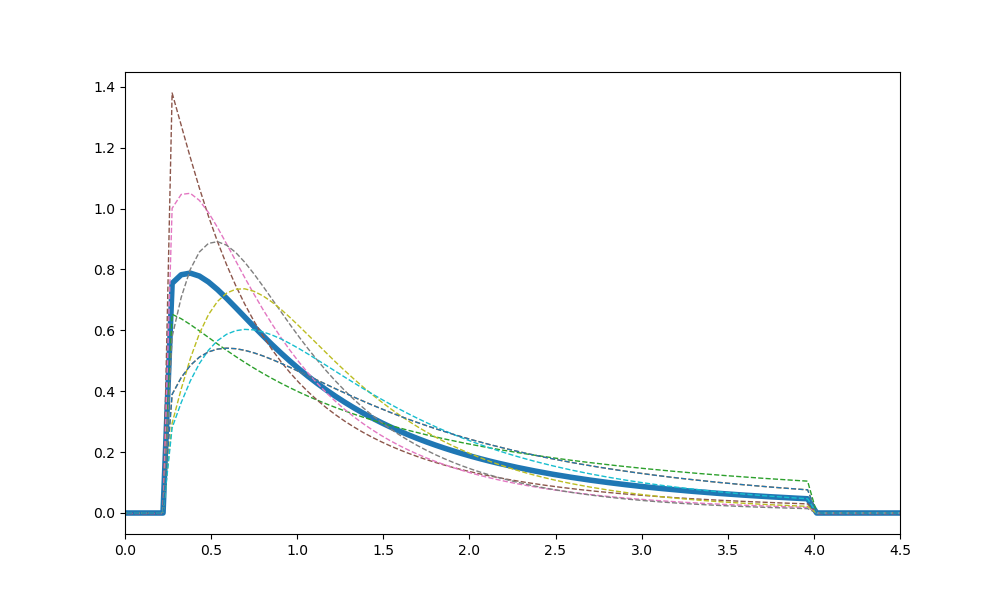

<IPython.core.display.Javascript object>


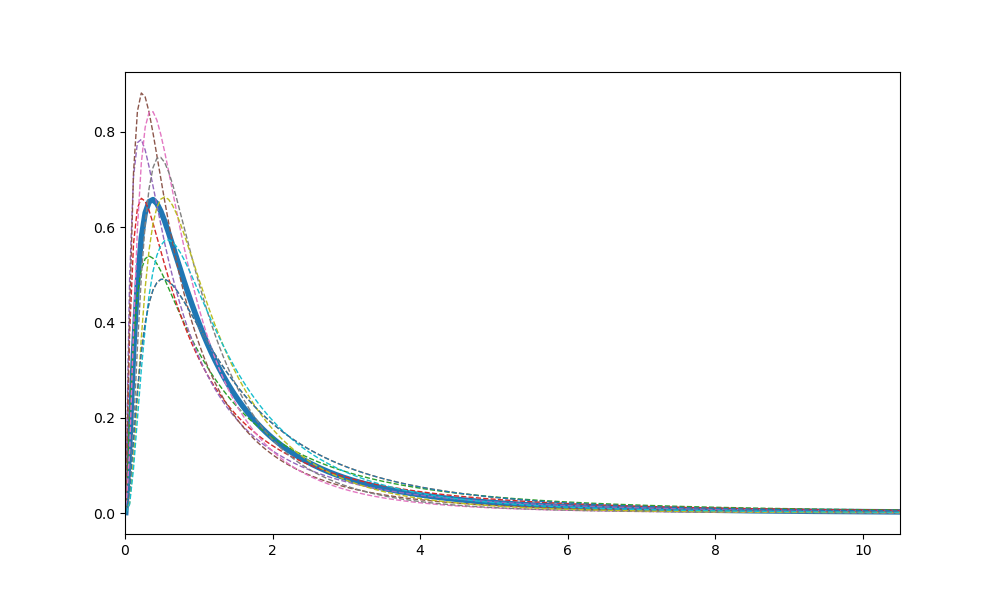

In [253]:
t = np.linspace(0.01,10.5,200)
plt.figure(figsize=(10,6))

# For the truncated case
    # compute and plot the initial density function 
L = [trGauss.log_normal_tr(0,1,x,np.exp(a),np.exp(b)) for x in t]
plt.plot(t,L,linewidth=4.0)

    # compute and plot the perturbed density functions
for i in range(10):
    Lp = [trGauss.log_normal_tr(C_tr_lognorm[i,0],C_tr_lognorm[i,1],x,np.exp(a),np.exp(b)) for x in t]
    plt.plot(t,Lp,linewidth=1.0,ls='--')

#plt.ylim(0,0.65)
plt.xlim(0,4.5);
plt.show()

plt.figure(figsize=(10,6))

# For the truncated case
    # compute and plot the initial density function 
L = [trGauss.log_normal(0,1,x) for x in t]
plt.plot(t,L,linewidth=4.0)

    # compute and plot the perturbed density functions
for i in range(10):
    Lp = [trGauss.log_normal(C_nontr_lognorm[i,0],C_nontr_lognorm[i,1],x) for x in t]
    plt.plot(t,Lp,linewidth=1.0,ls='--')

#plt.ylim(0,0.65)
plt.xlim(0,10.5);
plt.show()

## Triangular family

The probability density function of a triangular distribution $\mathcal T(m,a,b)$, parametrized by $m \in (a,b)$, is given by 

$$ q_m(x) = \frac{2(x-a)}{(b-a)(m-a)}\textbf{1}_{x\in (a,m]} + \frac{2(b-x)}{(b-a)(b-m)}\textbf{1}_{x\in (m,b)}$$
                                                       
The Fisher information can be computed explicitly and is given by the formula

$$ i_m = \frac{1}{b-a} \left( \frac{1}{b-m} + \frac{1}{m-a} \right) = \frac{1}{(b-m)(m-a)}.$$

This means that the Fisher-Rao distance $d$ on $\mathcal T$ is given by (because it is a one parameter family):

$$ d(m_0,m_1) = \int_{m_0}^{m_1} \sqrt{i_m} \ dm = \int_{m_0}^{m_1} \frac{dm}{\sqrt{(b-m)(m-a)}} $$

In addition, we can give an explicit expression for $d$, we start by rewriting

$$(b-m)(m-a) = -\left(m-\alpha \right)^2 + \beta,$$

where $\alpha:= \frac{(a+b)}{2}$ and $\beta := \left(\frac{a-b}{2}\right)^2$. Then we compute

$$d(m_0,m_1) =\left| \int_{m_0}^{m_1} \frac{dm}{\sqrt{-(m-\alpha)^2 + \beta}}\right| = \left|\int_{m_0}^{m_1}\frac{dm}{\sqrt{\beta}\sqrt{-\left(\frac{m-\alpha}{\sqrt{\beta}}\right)^2 + 1}} \right| \overset{u:=\frac{m-\alpha}{\sqrt{\beta}}}{=} \left|\int_{\frac{m_0-\alpha}{\sqrt{\beta}}}^{\frac{m_1-\alpha}{\sqrt{\beta}}} \frac{du}{\sqrt{1-u^2}}\right| =\left| \arcsin\left(\frac{m_1-\alpha}{\sqrt{\beta}}\right)-\arcsin\left(\frac{m_0-\alpha}{\sqrt{\beta}}\right)\right|.$$

Given $m_0 \in (a,b)$ and $\delta>0$, we can solve for $m$ in the equation $d(m_0,m)=\delta$ to obtain

$$
\begin{cases}
m_+ = \sqrt{\beta} \sin\left(\delta + \arcsin\left(\frac{m_0-\alpha}{\sqrt{\beta}}\right) \right) + \alpha, \ \ \ m\geq m_0, \\
m_- = \sqrt{\beta} \sin\left(\arcsin\left(\frac{m_0-\alpha}{\sqrt{\beta}}\right) - \delta \right) + \alpha, \ \ \ m < m_0,
\end{cases}
$$

In [4]:
#truncation interval
a,b = -1,1

#center point and radius of sphere
m = 0.5
delta = 0.5

# We now compute the corresponding sphere

m_minus,m_plus = trTriang.spheres_exact(m,delta,a,b)

<IPython.core.display.Javascript object>


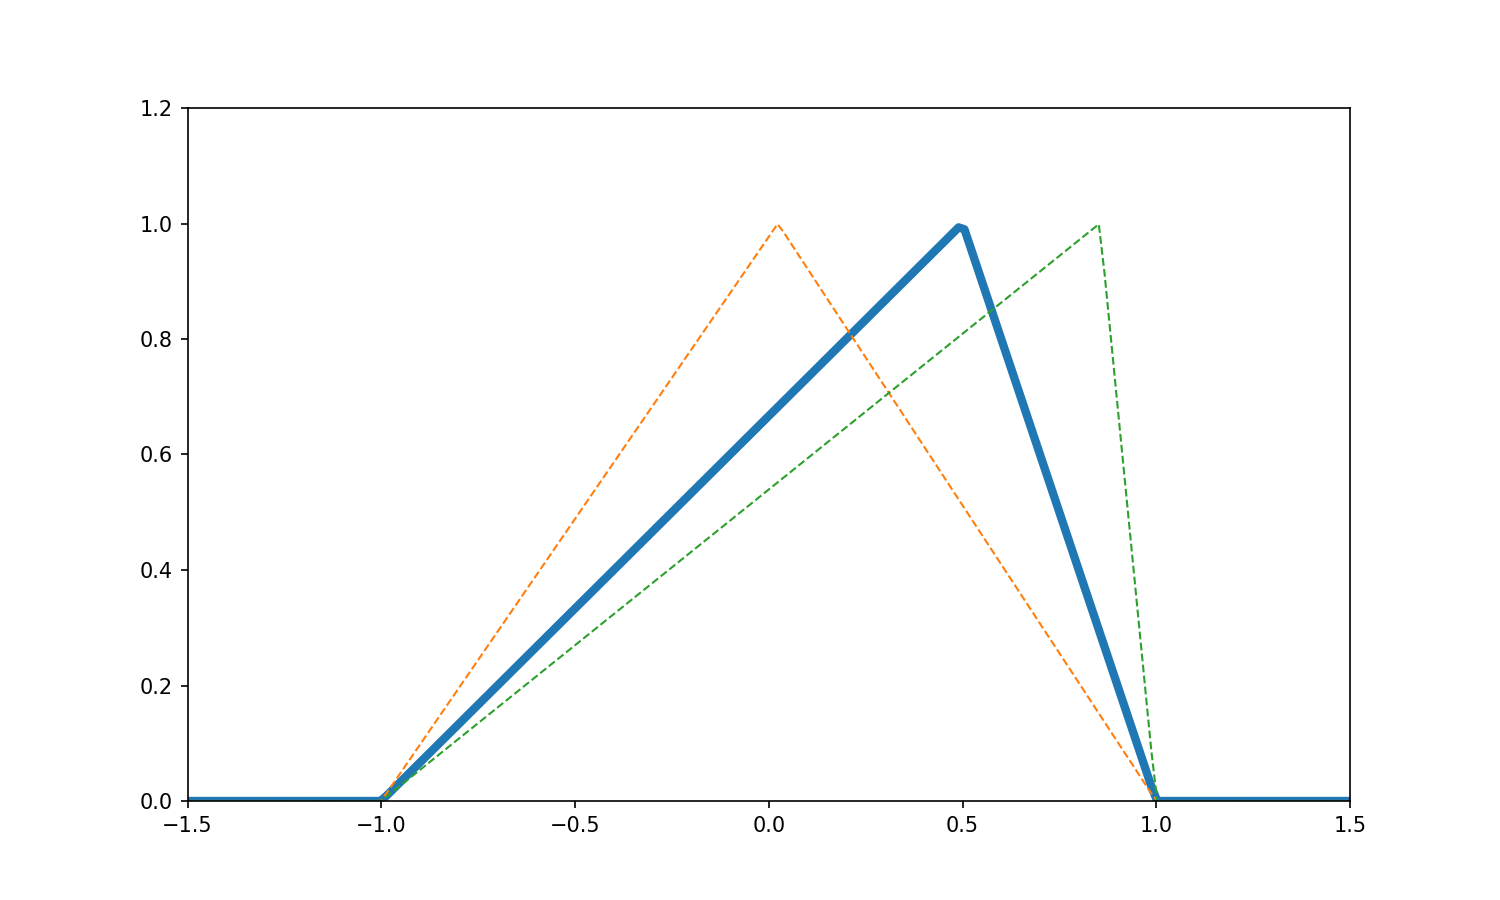

In [8]:
plt.figure(figsize=(10,6))

t = np.linspace(-1.5,1.5,200)

# plotting the initial density
L = trTriang.q(m,t,a,b)
plt.plot(t,L,linewidth=4.0)

#plotting the perturbed densities
L_minus = [trTriang.q(m_minus,np.array([x]),a,b) for x in t]
plt.plot(t,L_minus,linewidth=1.0,ls='--')

L_plus = [trTriang.q(m_plus,np.array([x]),a,b) for x in t]
plt.plot(t,L_plus,linewidth=1.0,ls='--')
plt.ylim(0,1.2)
plt.xlim(-1.5,1.5);

<IPython.core.display.Javascript object>


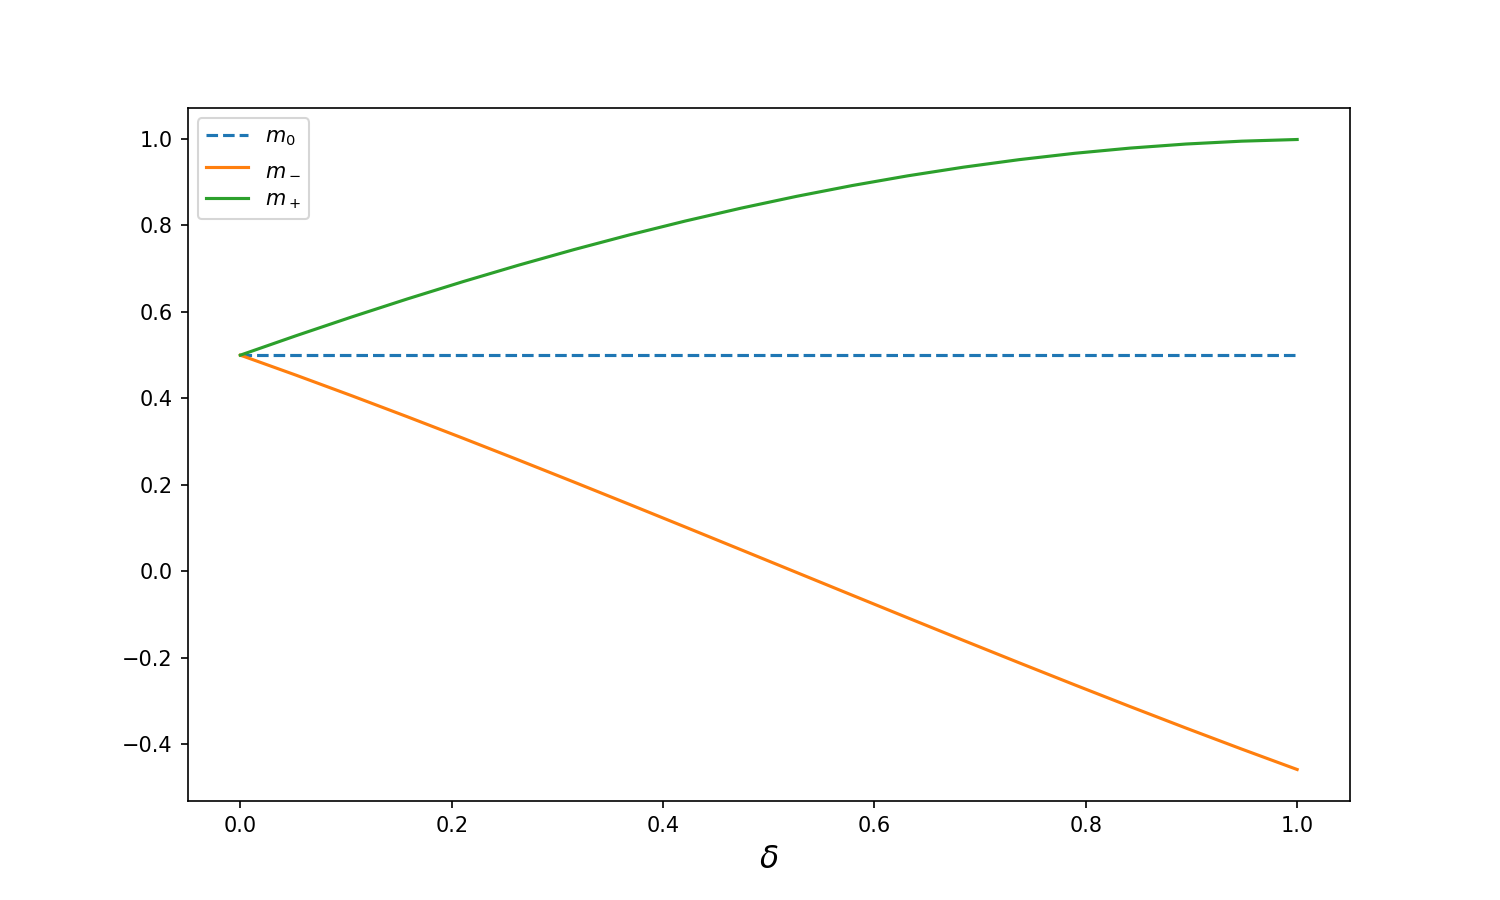

In [9]:
plt.figure(figsize=(10,6))
Delta = np.linspace(0,1,20)

a,b=-1,1
alpha = (a+b)/2
beta = ( (a-b)/2 )**2
m_0 = 0.5

S_plus = []
S_moins = []
for delta in Delta:
    S = trTriang.spheres_exact(m_0,delta,a,b)
    S_plus.append(S[1])
    S_moins.append(S[0])
    
plt.xlabel("$\delta$",fontsize=15)
plt.plot(Delta,m_0*np.ones(len(Delta)),linestyle='--',label="$m_0$")
plt.plot(Delta,S_moins,label="$m_-$")
plt.plot(Delta,S_plus,label="$m_+$")
plt.legend()

## Gumbel family

In [260]:
#truncation interval
a,b = -2,2

#number of points on the sphere for approximation
nb_pts = 10

#stepsize in the Euler method for solving the geodesic equations
h = 0.01

#center point and radius of sphere
p = [0,1]
delta = 0.5

# We now compute the sphere in the truncated and non-truncated case
start = timeit.default_timer()
n,C_tr,Liste_tr = trGumb.tracer_sphere_tr_avec_geod_Gumb(p,delta,nb_pts,h,a,b)
n,C_nontr,Liste_nontr = trGumb.tracer_sphere_nontr_avec_geod(p,delta,nb_pts,h)
stop = timeit.default_timer()
print(stop-start, "seconds")

j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
20.480163163039833 seconds


<IPython.core.display.Javascript object>


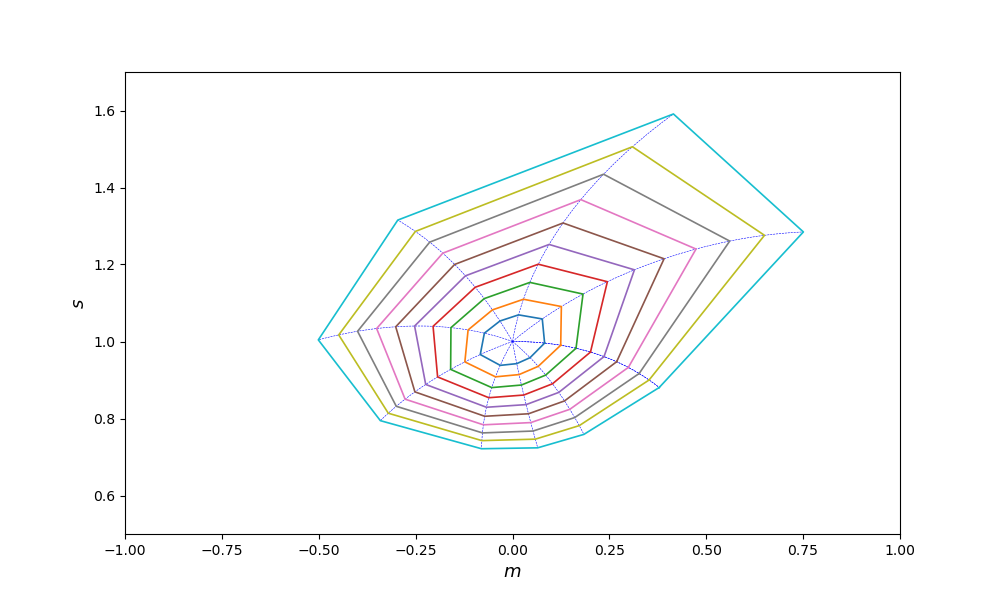

<IPython.core.display.Javascript object>


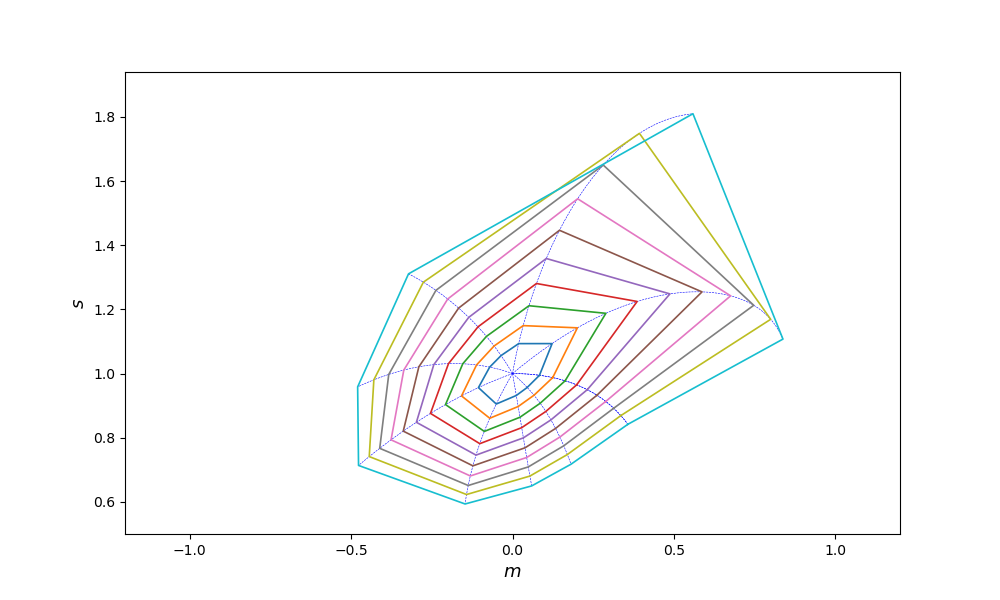

In [261]:
# Draws the geodesics going from the center of the sphere in the non truncated case
plt.figure(figsize=(10,6))
for i in range(nb_pts):
    X= Liste_nontr[i][0]
    Y= Liste_nontr[i][1]
    plt.plot(X,Y,color="blue",ls='--',linewidth = 0.4)

# nomber of concentric spheres
nb_sphere = 10

# Draws the concentric spheres
l = concentric_spheres(Liste_nontr,n,nb_sphere+1)
for i in range(1,nb_sphere):
    plt.plot(l[i][0],l[i][1],linewidth=1.2)
plt.plot(C_nontr[:,0],C_nontr[:,1],linewidth=1.2)
#plt.xlim(-3.5,3.5)
#plt.ylim(0,4.2)
plt.xlim(-1,1)
plt.ylim(0.5,0.5 +1.2)
plt.xlabel('$m$',fontsize="13")
plt.ylabel('$s$',fontsize="13");

plt.show()

# Draws the geodesics going from the center of the sphere in the truncated case

plt.figure(figsize=(10,6))
for i in range(nb_pts):
    X= Liste_tr[i][0]
    Y= Liste_tr[i][1]
    plt.plot(X,Y,color="blue",ls='--',linewidth = 0.4)

# nomber of concentric spheres
nb_sphere = 10

# Draws the concentric spheres
l = concentric_spheres(Liste_tr,n,nb_sphere+1)
for i in range(1,nb_sphere):
    plt.plot(l[i][0],l[i][1],linewidth=1.2)
plt.plot(C_tr[:,0],C_tr[:,1],linewidth=1.2)
plt.xlim(-1.2,1.2)
plt.ylim(0.5,0.5+1.44)
plt.xlabel('$m$',fontsize="13")
plt.ylabel('$s$',fontsize="13");

<IPython.core.display.Javascript object>


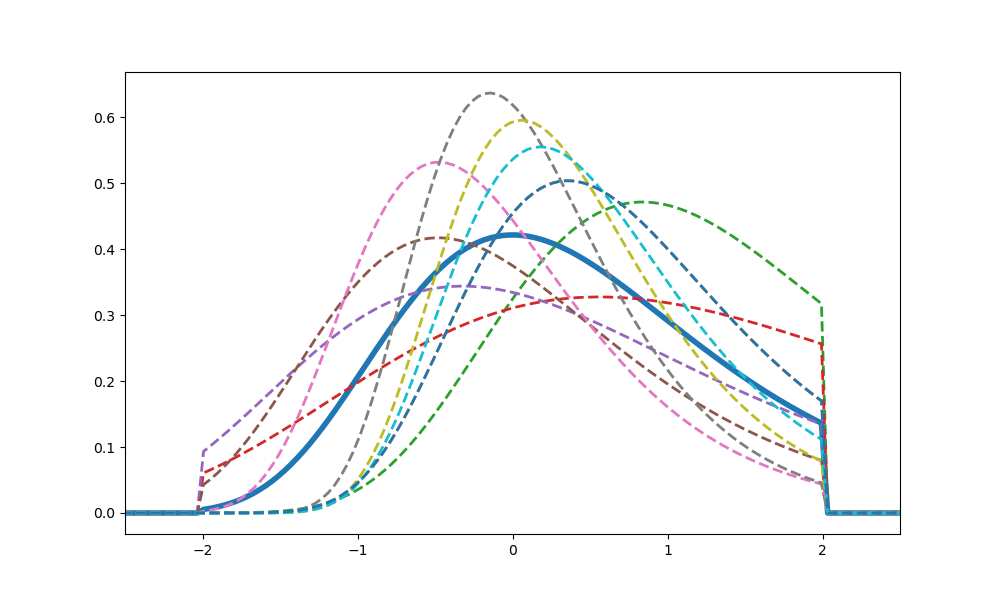

<IPython.core.display.Javascript object>


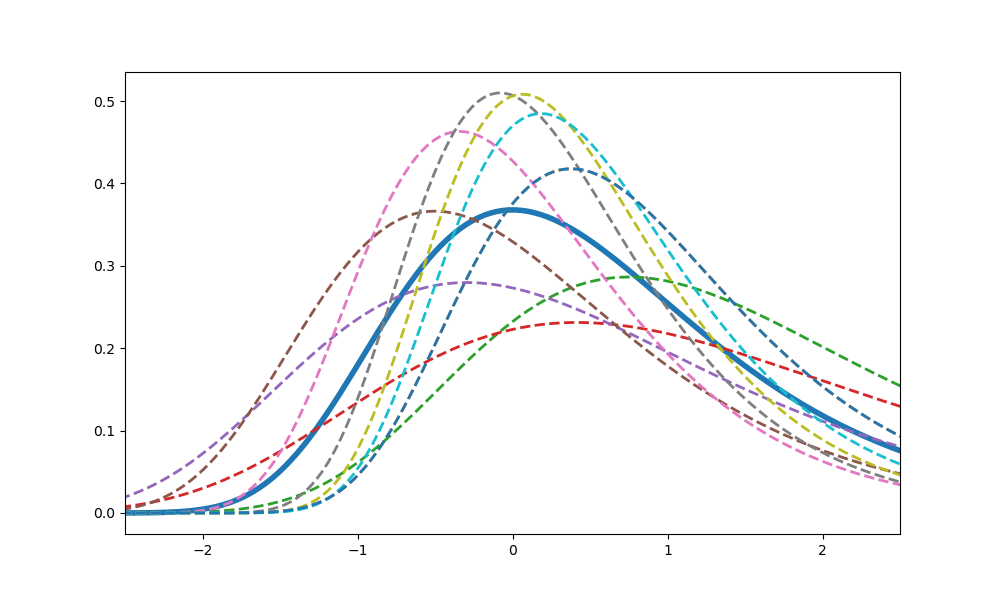

In [264]:
t = np.linspace(-3,3,150)
plt.figure(figsize=(10,6))


    # compute and plot the initial density function 
L = [trGumb.q(p[0],p[1],x,a,b) for x in t]
plt.plot(t,L,linewidth=4.0)

    # compute and plot the perturbed density functions
for i in range(10):
    Lp = [trGumb.q(C_tr[i,0],C_tr[i,1],x,a,b) for x in t]
    plt.plot(t,Lp,linewidth=2,ls='--')

#plt.ylim(0,0.65)
plt.xlim(-2.5,2.5);
plt.show()
# For the non-truncated case

plt.figure(figsize=(10,6))

    # compute and plot the initial density function 
L = [trGumb.p(p[0],p[1],x) for x in t]
plt.plot(t,L,linewidth=4.0)

    # compute and plot the perturbed density functions
for i in range(10):
    Lp = [trGumb.p(C_nontr[i,0],C_nontr[i,1],x) for x in t]
    plt.plot(t,Lp,linewidth=2,ls='--')

#plt.ylim(0,0.65)
plt.xlim(-2.5,2.5);  

## Gamma family

In [270]:
#number of points on the sphere for approximation
nb_pts = 100

#stepsize in the Euler method for solving the geodesic equations
h = 0.01

#center point and radius of sphere
p = [2,1]
delta = 0.5

# We now compute the sphere in the truncated and non-truncated case

start = timeit.default_timer()
n,C_nontr_Gam,Liste_nontr_Gam = trGam.tracer_sphere_nontr_avec_geod(p,delta,nb_pts,h)
stop = timeit.default_timer()
print(stop-start, "seconds")

0.7742716770153493 seconds


<IPython.core.display.Javascript object>


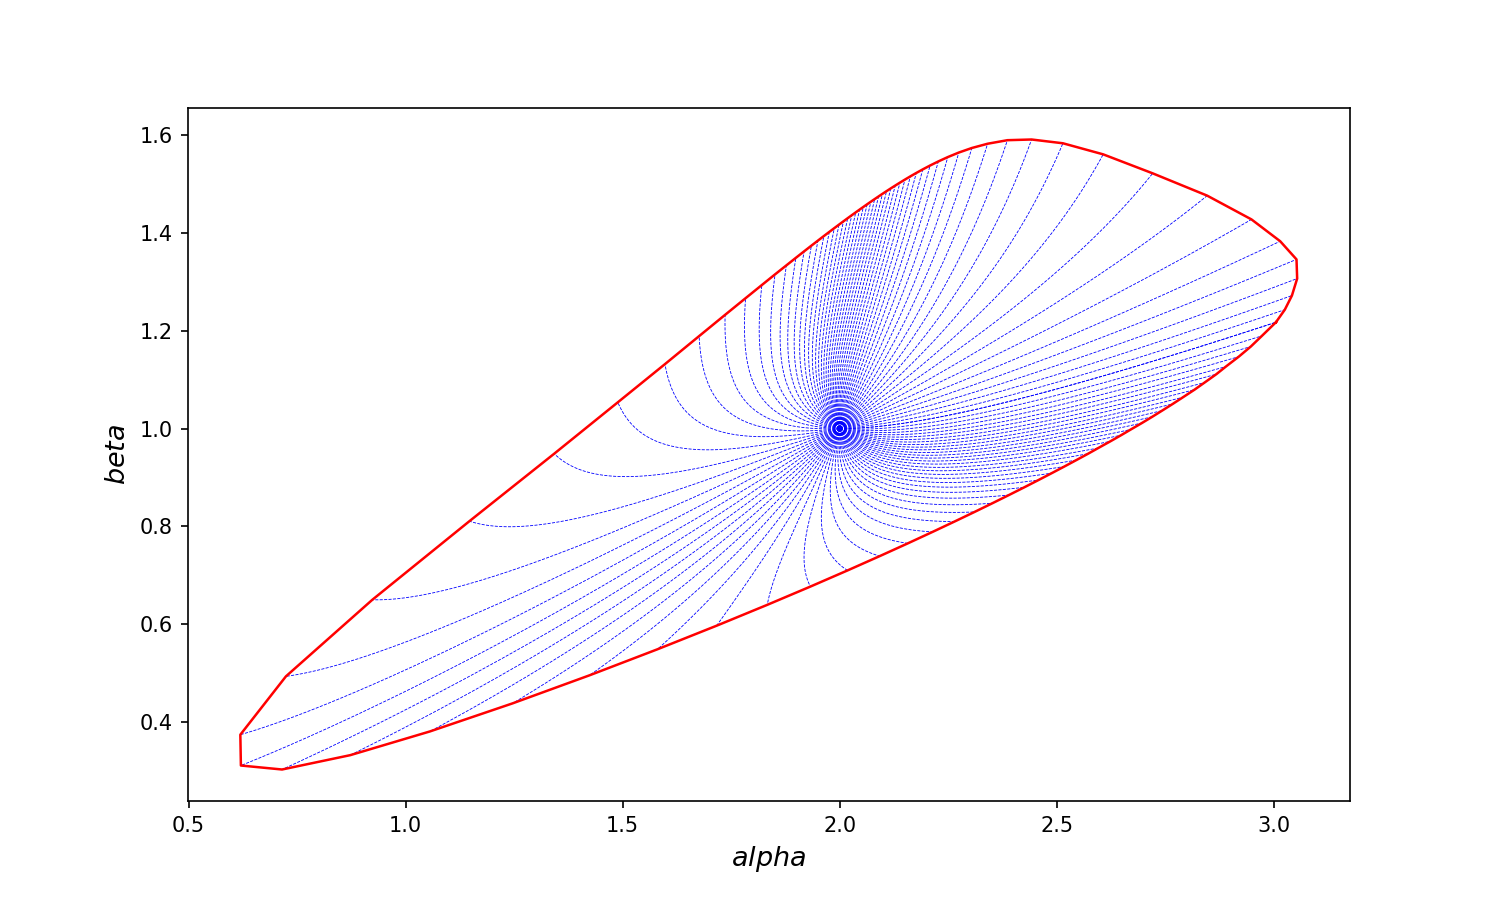

In [281]:
# Draws the geodesics going from the center of the sphere in the non truncated case

plt.figure(figsize=(10,6))
for i in range(nb_pts):
    X= Liste_nontr_Gam[i][0]
    Y= Liste_nontr_Gam[i][1]
    plt.plot(X,Y,color="blue",ls='--',linewidth = 0.4)

# nomber of concentric spheres
nb_sphere = 10

# Draws the concentric spheres
l = concentric_spheres(Liste_nontr_Gam,n,nb_sphere+1)
#for i in range(1,nb_sphere):
    #plt.plot(l[i][0],l[i][1],linewidth=1.2)
plt.plot(C_nontr_Gam[:,0],C_nontr_Gam[:,1],linewidth=1.2,color='red')
#plt.xlim(-3.5,3.5)
#plt.ylim(0,4.2)

plt.xlabel('$alpha$',fontsize="13")
plt.ylabel('$beta$',fontsize="13");

plt.show()

<IPython.core.display.Javascript object>


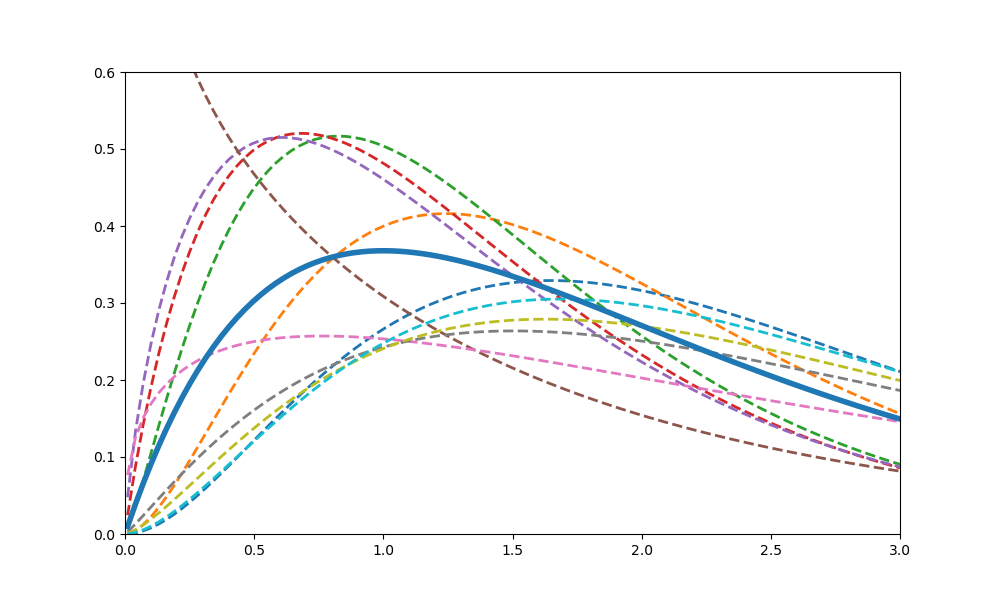

In [268]:
plt.figure(figsize=(10,6))
t= np.linspace(0.01,3,100)
    # compute and plot the initial density function 
L = [trGam.p(p[0],p[1],x) for x in t]


liste_indice = [0,1,2,6,7,8,9,10,11,13]
    # compute and plot the perturbed density functions
for i in liste_indice:
    Lp = [trGam.p(C_nontr_Gam[i,0],C_nontr_Gam[i,1],x) for x in t]
    plt.plot(t,Lp,linewidth=2,ls='--')
plt.plot(t,L,linewidth=4.0)
plt.ylim(0,0.6)
plt.xlim(0,3);  

## Exponential distributions family

This family is given by
$$ p_\lambda(x) = \lambda e^{-\lambda x} \textbf{1}_{x>0}.$$

The Fisher information is the function
$$ i_\lambda = \frac{1}{\lambda^2},$$
and the Fisher-Rao geodesic distance is given by
$$ d(\lambda_0,\lambda_1) = \left|\log\left(\frac{\lambda_1}{\lambda_0}\right) \right|.$$
This explicit formulation allows us to compute the Fisher-Rao sphere $\mathcal S(\lambda_0,\delta)$:
$$d(\lambda_0,\lambda) = \delta \iff  \begin{cases}
\lambda = \lambda_0 e^{\delta}, \ \lambda\geq \lambda_0,\\
\lambda = \lambda_0 e^{-\delta}, \ \lambda\leq \lambda_0,\\
\end{cases}$$

<IPython.core.display.Javascript object>


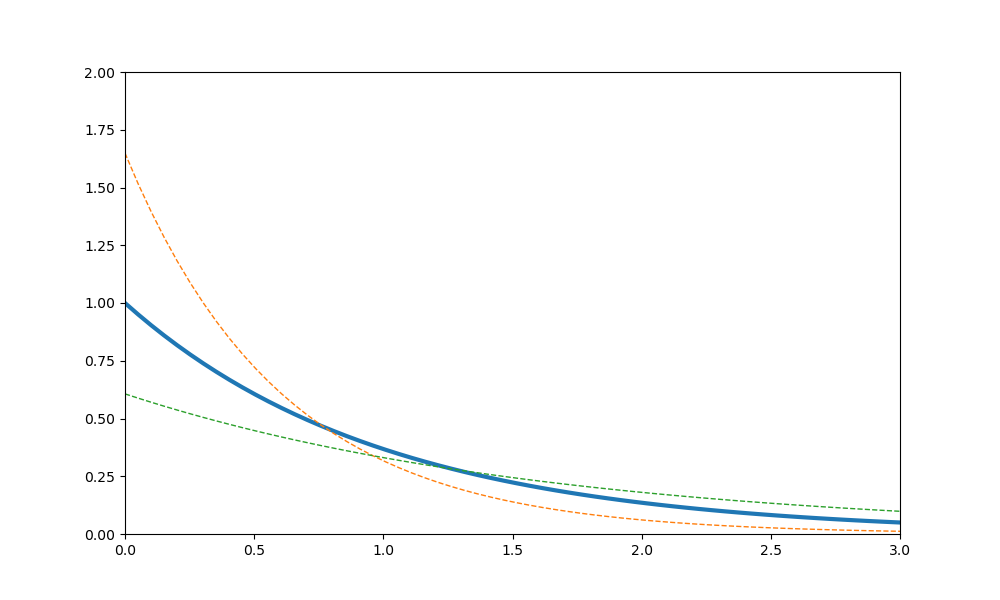

(0.0, 3.0)

In [237]:
lambda_0 = 1
delta = 0.5

lambda_plus = lambda_0*np.exp(delta)
lambda_moins = lambda_0*np.exp(-delta)

def p_exponential_distrib(lambda_0,x):
    return lambda_0*np.exp(-lambda_0*x)

line = np.linspace(0,5,100)
plt.figure(figsize=(10,6))
plt.plot(line,[p_exponential_distrib(lambda_0,x) for x in line],linewidth=3)
plt.plot(line, [p_exponential_distrib(lambda_plus,x) for x in line],ls='--',linewidth=1)
plt.plot(line, [p_exponential_distrib(lambda_moins,x) for x in line],ls='--',linewidth=1)

plt.ylim(0,2)
plt.xlim(0,3)

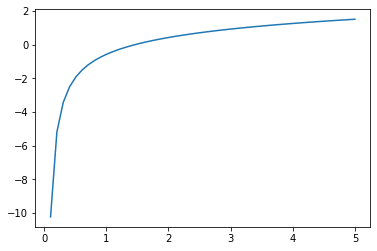

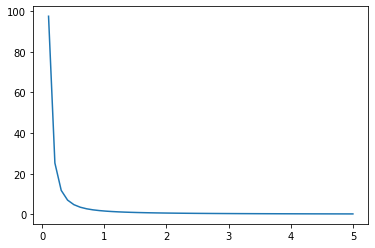

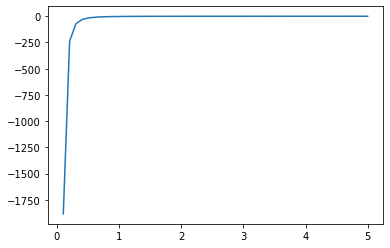

In [49]:
L = np.linspace(0,5,50)
M = [trGam.digamma(x) for x in L]
plt.plot(L,M)
plt.show()

M = [trGam.digamma_prime(x) for x in L]
plt.plot(L,M)
plt.show()

M = [trGam.digamma_seconde(x) for x in L]
plt.plot(L,M)

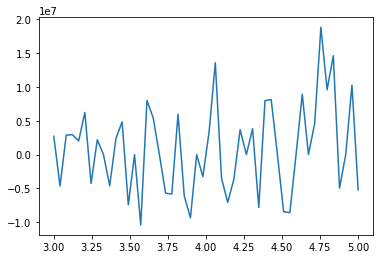

In [43]:
alpha = 3
beta = 1
L = np.linspace(3,5,50)
B = [trGam.curvature_nontr(alpha,beta) for alpha in L]
plt.plot(L,B)

0.6941810259595513 sec


<IPython.core.display.Javascript object>


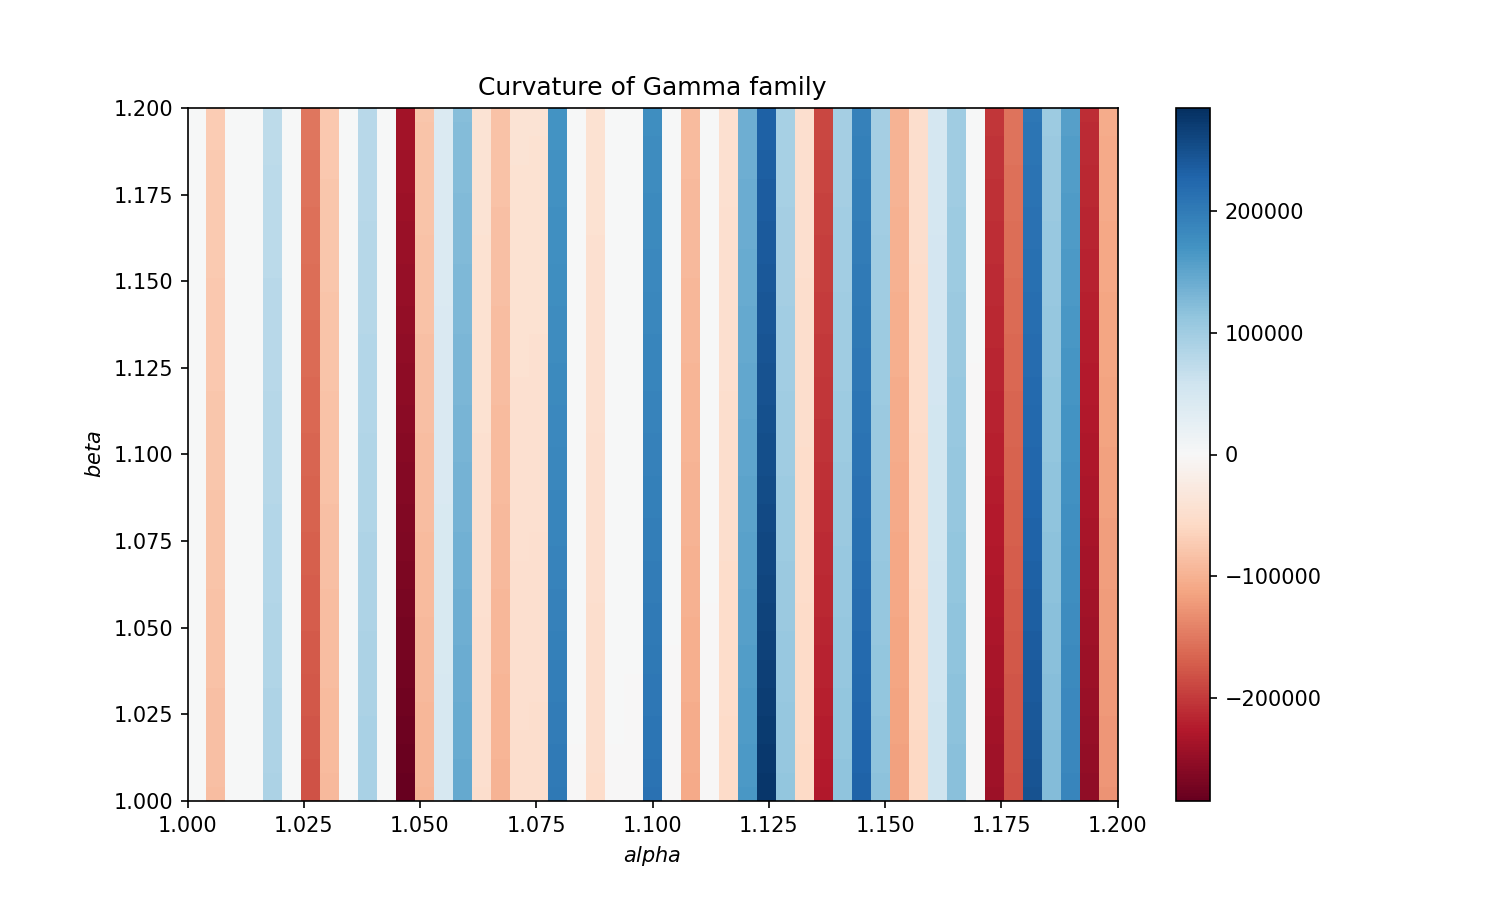

In [113]:
mesh_m = 50
mesh_s = 50

mu_min = 1
mu_max = 1.2
sigma_min = 1
sigma_max = 1.2

mu, sigma = np.meshgrid(np.linspace(mu_min,mu_max, mesh_m), np.linspace(sigma_min, sigma_max, mesh_s))

alpha = np.linspace(mu_min,mu_max, mesh_m)
beta = np.linspace(sigma_min, sigma_max, mesh_s)
z = np.zeros((mesh_m,mesh_s))
start = timeit.default_timer()

for i in range(mesh_m):
    for j in range(mesh_s):
        z[i,j] = trGam.curvature_nontr(alpha[i],beta[j]) 
        #print(z[i,j])
    #print("saut")
stop = timeit.default_timer()
print(stop - start,"sec")

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max =-np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots(figsize=(10,6))

c = ax.pcolormesh(mu, sigma, z.transpose(), cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('Curvature of Gamma family')
# set the limits of the plot to the limits of the data
ax.axis([mu.min(), mu.max(), sigma.min(), sigma.max()])
plt.xlabel('$alpha$')
plt.ylabel('$beta$')
fig.colorbar(c, ax=ax)

plt.show()

From [1], the Riemann curvature tensor and the Gaussian curvature of the Gamma family are given by the formulae:

$$ R_{1212} = \frac{-(\alpha + 1)(\alpha-1)\big(u\psi''(u) + \psi(u) \big) }{4v^2 ( u\psi'(u) - 1)}, \ \ \ K_{12} = \frac{-(\alpha + 1)(\alpha-1)\big(u\psi''(u) + \psi'(u)\big)}{4(u\psi'(u) -1)^2}$$



[1] A note on finding geodesic equation of two parameters Gamma distribution, William W.S. Chen